In [1]:
import pandas as pd
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ROI_MASK_DIR = '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/'

In [3]:
roi_mask_file_paths = glob(ROI_MASK_DIR + 'zoom5_opening*.npy')

In [4]:
roi_mask_file_paths

['/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_081.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_035.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_012.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_023.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_057.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_059.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_094.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bounding_boxes/mask/zoom5_opening_mask_tumor_101.npy',
 '/home/sjb/Projects/Columbia/Applied_DL/CamelyonProject/data/bo

In [8]:
meta_file_path = '../../../data/zoom_1_256_256_partition/meta/all_info_0.4_grayscale_tol.json'

In [9]:
meta_df = pd.read_json(meta_file_path, dtype=False)

In [10]:
meta_df.head()

,file_name,img_id,include,label,non_gray_ratio,type
0,tumor_slide_001_split_249_24.png,001,0,0,0.016266,val
1,tumor_slide_001_split_31_127.png,001,0,0,0.004410,val
2,tumor_slide_001_split_108_188.png,001,0,0,0.000320,val
3,tumor_slide_001_split_406_51.png,001,0,0,0.000000,val
4,tumor_slide_001_split_160_72.png,001,1,0,0.720123,val


In [11]:
meta_df.shape

(1266294, 6)

In [14]:
file_name_to_roi_map = {}

In [15]:
PATCH_HEIGHT = 256
PATCH_WIDTH = 256

In [18]:
DOWN_SAMPLE_FACTOR = 16 # ratio between zoom level 1 (img) and zoom level 5 (mask)

In [19]:
for img_id, meta_df_for_img in tqdm(meta_df.groupby('img_id')):
    
    roi_mask_file_name = 'zoom5_opening_mask_tumor_{}.npy'.format(img_id)
    roi_mask = np.load(os.path.join(ROI_MASK_DIR, roi_mask_file_name))
    
    for img_file_name in meta_df_for_img['file_name'].values:
        row_id = int(img_file_name.split('_')[-2])
        col_id = int(img_file_name.split('_')[-1].split('.')[0])

        x_start = row_id * PATCH_HEIGHT // DOWN_SAMPLE_FACTOR
        x_end = x_start + PATCH_HEIGHT // DOWN_SAMPLE_FACTOR
        y_start = col_id * PATCH_WIDTH // DOWN_SAMPLE_FACTOR
        y_end = y_start + PATCH_WIDTH // DOWN_SAMPLE_FACTOR

        opening_patch = roi_mask[x_start:x_end, y_start:y_end]

        if opening_patch.sum() > 1:
            is_roi = True
        else:
            is_roi = False
        
        file_name_to_roi_map[img_file_name] = is_roi

100%|██████████| 21/21 [00:27<00:00,  1.36it/s]


In [21]:
meta_df['is_roi'] = meta_df['file_name'].map(file_name_to_roi_map)

In [22]:
meta_df['is_roi'] = meta_df['is_roi'].astype(int)

In [25]:
meta_df.to_json('../../../data/zoom_1_256_256_partition/meta/all_info_0.4_grayscale_tol_with_roi.json')

In [24]:
meta_df.head()

,file_name,img_id,include,label,non_gray_ratio,type,is_roi
0,tumor_slide_001_split_249_24.png,001,0,0,0.016266,val,0
1,tumor_slide_001_split_31_127.png,001,0,0,0.004410,val,0
2,tumor_slide_001_split_108_188.png,001,0,0,0.000320,val,0
3,tumor_slide_001_split_406_51.png,001,0,0,0.000000,val,0
4,tumor_slide_001_split_160_72.png,001,1,0,0.720123,val,1


In [27]:
# meta_df[(meta_df['label'] == 1) & (meta_df['is_roi'] == False)]

In [28]:
meta_df[(meta_df['is_roi'] == True) & (meta_df['include'] == False)].shape

(85372, 7)

In [33]:
# investigate - too many is_roi = False

In [29]:
meta_df[(meta_df['include'] == True) & (meta_df['is_roi'] == False)].shape

(8409, 7)

In [30]:
meta_df[(meta_df['include'] == True) & (meta_df['is_roi'] == True)].shape

(94166, 7)

In [31]:
meta_df[(meta_df['include'] == False) & (meta_df['is_roi'] == False)].shape

(1078347, 7)

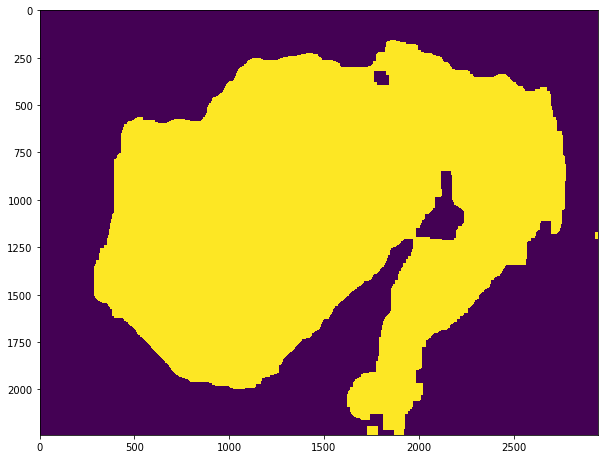

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(roi_mask)

#### Dummy - lets delete the below

In [7]:
meta_df = pd.read_json('../../../data/zoom_1_256_256_partition/meta/all_info_0.4_grayscale_tol_with_roi.json', 
                   dtype=False)

In [8]:
meta_df.head()

,file_name,img_id,include,label,non_gray_ratio,type,is_roi
0,tumor_slide_001_split_249_24.png,001,0,0,0.016266,val,0
1,tumor_slide_001_split_31_127.png,001,0,0,0.004410,val,0
10,tumor_slide_001_split_327_7.png,001,0,0,0.000015,val,0
100,tumor_slide_001_split_89_149.png,001,0,0,0.000000,val,0
1000,tumor_slide_001_split_211_167.png,001,0,0,0.002487,val,0


In [14]:
meta_df[(meta_df['label'] == 1) & (meta_df['is_roi'] == True)].shape

(14346, 7)

In [16]:
meta_df[(meta_df['label'] == 1) & (meta_df['is_roi'] == False)].shape

(28, 7)

In [17]:
meta_df[(meta_df['label'] == 0) & (meta_df['is_roi'] == True)].shape

(165192, 7)

In [18]:
meta_df[(meta_df['label'] == 0) & (meta_df['is_roi'] == False)].shape

(1086728, 7)

In [19]:
meta_df[(meta_df['label'] == 1) & (meta_df['include'] == True)].shape

(13804, 7)

In [20]:
meta_df[(meta_df['label'] == 1) & (meta_df['include'] == False)].shape

(570, 7)

In [21]:
meta_df[(meta_df['label'] == 0) & (meta_df['include'] == True)].shape

(88771, 7)

In [22]:
meta_df[(meta_df['label'] == 0) & (meta_df['include'] == False)].shape

(1163149, 7)

In [11]:
sub_df = meta_df[meta_df['is_roi'] == True].copy()

In [12]:
sub_df.shape

(179538, 7)

In [13]:
sub_df['label'].value_counts()

0    165192
1     14346
Name: label, dtype: int64

In [25]:
temp_df = meta_df[meta_df['include'] == True]

In [29]:
temp_df[temp_df['is_roi'] == False].shape

(8409, 7)

In [30]:
temp_df.shape

(102575, 7)